<a href="https://colab.research.google.com/github/Josh-The-Homie/MLA_JHH/blob/main/MLA1_JHH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Machine Learning Assignment 1
# Joshua Henderson
# CS430
# Machine Learning in the Cloud
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive to access the uploaded dataset
from google.colab import drive
drive.mount('/content/drive')

# Read the dataset from the specified path
df = pd.read_csv('/content/drive/My Drive/CS430/Assignment 1/weather_2012.csv')

Mounted at /content/drive


In [12]:
# Display the first five rows
print("First five rows:")
print(df.head())

# Display the last five rows
print("\nLast five rows:")
print(df.tail())

# Display a sample of five random rows
print("\nRandom sample of five rows:")
print(df.sample(5))

First five rows:
             Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
0  2012-01-01 00:00:00      -1.8                -3.9           86   
1  2012-01-01 01:00:00      -1.8                -3.7           87   
2  2012-01-01 02:00:00      -1.8                -3.4           89   
3  2012-01-01 03:00:00      -1.5                -3.2           88   
4  2012-01-01 04:00:00      -1.5                -3.3           88   

   Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)               Weather  
0                4              8.0           101.24                   Fog  
1                4              8.0           101.24                   Fog  
2                7              4.0           101.26  Freezing Drizzle,Fog  
3                6              4.0           101.27  Freezing Drizzle,Fog  
4                7              4.8           101.23                   Fog  

Last five rows:
                Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
8779  2012-12-31 

In [13]:
# List all columns in the dataset
print("\nColumns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather']


In [14]:
# Rename the columns
df.columns = ['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']


In [15]:
# Get standard statistics for each column
print("\nStandard statistics for each column:")
print(df.describe())



Standard statistics for each column:
            temp_c    dew_point  relative_humidity   wind_speed   visibility  \
count  8784.000000  8784.000000        8784.000000  8784.000000  8784.000000   
mean      8.798144     2.555294          67.431694    14.945469    27.664447   
std      11.687883    10.883072          16.918881     8.688696    12.622688   
min     -23.300000   -28.500000          18.000000     0.000000     0.200000   
25%       0.100000    -5.900000          56.000000     9.000000    24.100000   
50%       9.300000     3.300000          68.000000    13.000000    25.000000   
75%      18.800000    11.800000          81.000000    20.000000    25.000000   
max      33.000000    24.400000         100.000000    83.000000    48.300000   

          pressure  
count  8784.000000  
mean    101.051623  
std       0.844005  
min      97.520000  
25%     100.560000  
50%     101.070000  
75%     101.590000  
max     103.650000  


In [16]:
# Add a column for temperature in Fahrenheit
df['temp_f'] = (df['temp_c'] * 9/5) + 32


In [17]:
# Rearrange columns so temp_f appears before temp_c
df = df[['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']]


In [18]:
# Display data types of all columns
print("\nData types of all columns:")
print(df.dtypes)



Data types of all columns:
date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object


In [19]:
# Convert date_time column to a date/time column
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Verify conversion
print("\nConverted date_time data type:")
print(df['date_time'].dtypes)



Converted date_time data type:
datetime64[ns]


In [20]:
# Get the average temperature in Fahrenheit for each month
df['month'] = df['date_time'].dt.month
monthly_avg = df.groupby('month')['temp_f'].mean()
print("\nMonthly average temperatures in Fahrenheit:")
print(monthly_avg)



Monthly average temperatures in Fahrenheit:
month
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64


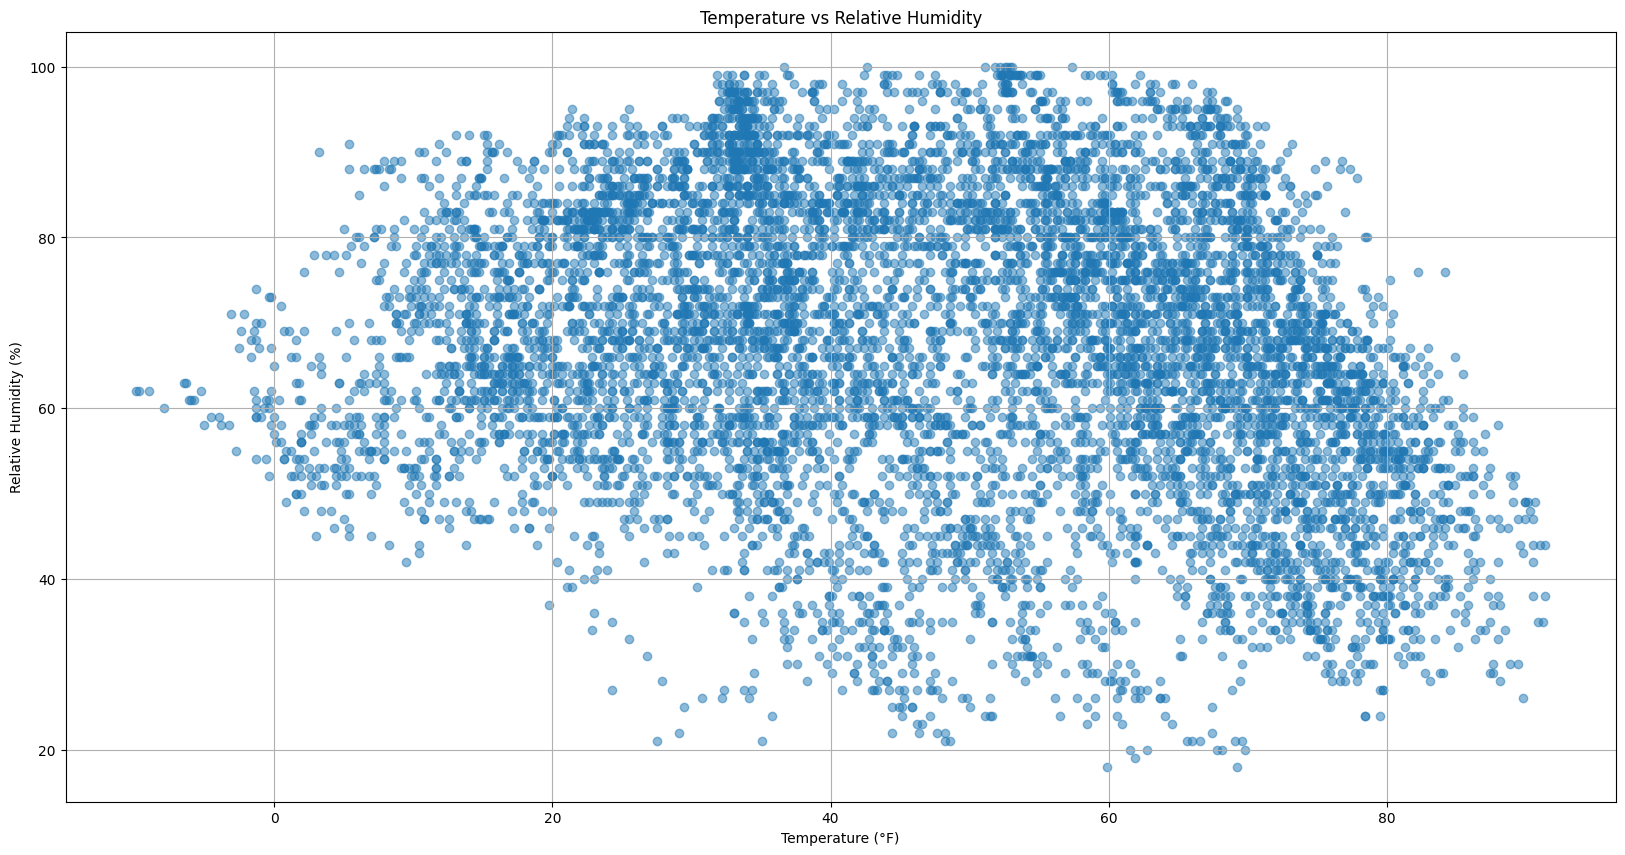

In [21]:
# Scatterplot of temperature vs relative humidity
plt.figure(figsize=(20, 10))
plt.scatter(df['temp_f'], df['relative_humidity'], alpha=0.5)
plt.title('Temperature vs Relative Humidity')
plt.xlabel('Temperature (°F)')
plt.ylabel('Relative Humidity (%)')
plt.grid()
plt.show()


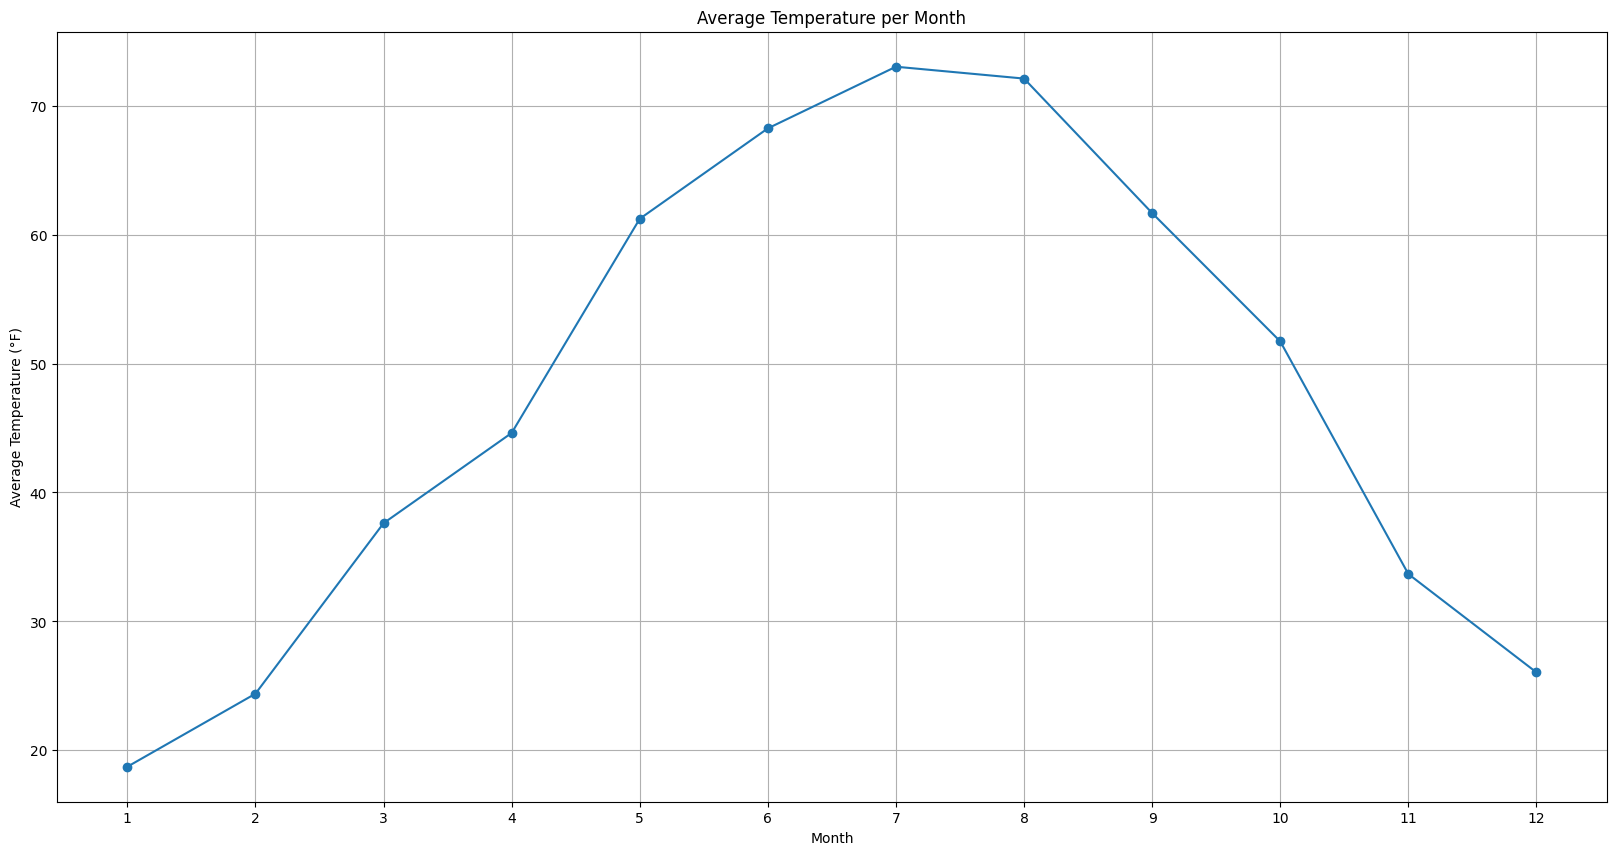

In [22]:
# Line chart showing average temperature per month
plt.figure(figsize=(20, 10))
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.xticks(np.arange(1, 13, 1))
plt.grid()
plt.show()


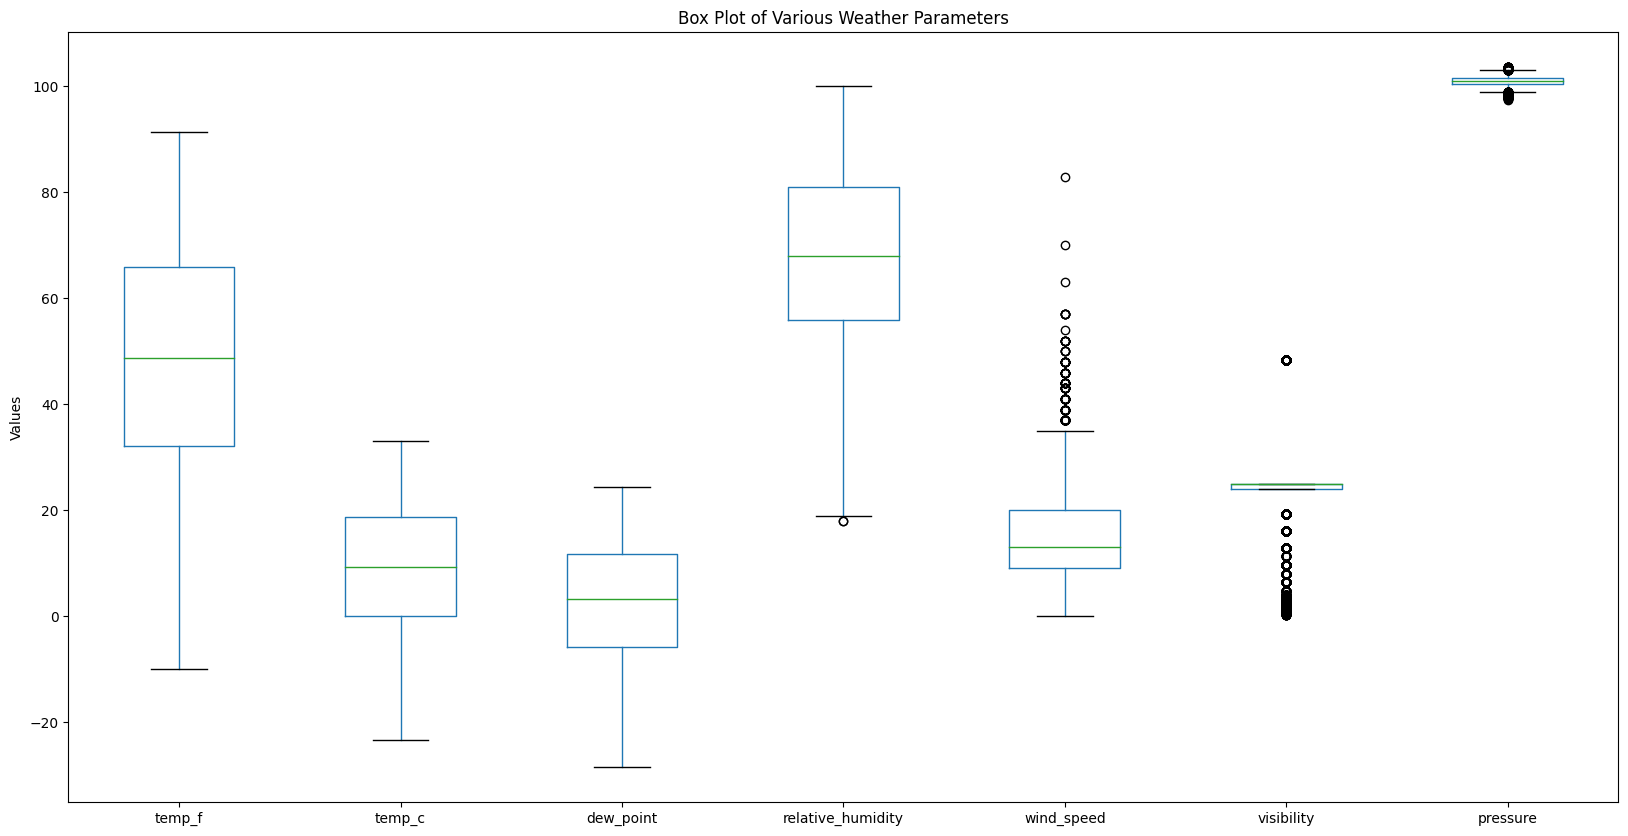

In [25]:
# Generate a box plot for temperature in Fahrenheit
plt.figure(figsize=(20, 10))
df[['temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure']].boxplot()
plt.title('Box Plot of Various Weather Parameters')
plt.ylabel('Values')
plt.grid()
plt.show()
